# Asthma Hospitalizations in Chicago (ZIP Code Groupings)

This notebook explores patterns in asthma-related hospitalizations across
Chicago ZIP code groupings using publicly available data from the City of
Chicago. The analysis is descriptive and focuses on identifying geographic
variation in hospitalization rates for a single year.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
asthma = pd.read_csv("../data/asthma_hospitalizations.csv")
asthma.head()

,ZIP code (or aggregate),Hospitalizations 2000,Crude Rate 2000,Crude Rate 2000 Lower CI,Crude Rate 2000 Upper CI,Adjusted Rate 2000 (Ages 5-64 only),Adjusted Rate 2000 Lower CI,Adjusted Rate 2000 Upper CI,Hospitalizations 2001,Crude Rate 2001,...,Adjusted Rate 2010 (Ages 5-64 only),Adjusted Rate 2010 Lower CI,Adjusted Rate 2010 Upper CI,Hospitalizations 2011,Crude Rate 2011,Crude Rate 2011 Lower CI,Crude Rate 2011 Upper CI,Adjusted Rate 2011 (Ages 5-64 only),Adjusted Rate 2011 Lower CI,Adjusted Rate 2011 Upper CI
0,"60606, 60607 & 60661",56.0,25.9,19.6,33.6,21.5,13.9,30.8,46.0,20.1,...,15.1,7.8,24.7,34.0,10.0,6.9,14.0,15.9,8.9,24.9
1,"60601, 60602, 60603, 60604, 60605 & 60611",60.0,13.3,10.2,17.1,17.0,10.0,25.7,42.0,8.9,...,9.6,5.3,15.2,64.0,9.6,7.4,12.2,8.6,5.1,12.8
2,60608,258.0,27.9,24.5,31.3,25.3,21.6,29.2,206.0,22.5,...,13.6,10.9,16.6,145.0,17.5,14.7,20.4,15.6,12.7,18.8
3,60609,386.0,48.6,43.7,53.4,46.3,40.8,52.1,336.0,43.1,...,23.5,19.5,27.9,195.0,30.0,25.8,34.3,27.7,23.3,32.5
4,60610 & 60654,160.0,33.7,28.5,38.9,33.3,26.7,40.5,172.0,35.8,...,21.6,15.8,28.3,84.0,16.0,12.7,19.8,21.6,15.2,29.2


In [16]:
asthma.shape

(49, 85)

In [18]:
asthma.columns

Index(['ZIP code (or aggregate)', 'Hospitalizations 2000', 'Crude Rate 2000',
       'Crude Rate 2000 Lower CI', 'Crude Rate 2000 Upper CI',
       'Adjusted Rate 2000 (Ages 5-64 only)', 'Adjusted Rate 2000 Lower CI',
       'Adjusted Rate 2000 Upper CI', 'Hospitalizations 2001',
       'Crude Rate 2001', 'Crude Rate 2001 Lower CI',
       'Crude Rate 2001 Upper CI', 'Adjusted Rate 2001 (Ages 5-64 only)',
       'Adjusted Rate 2001 Lower CI', 'Adjusted Rate 2001 Upper CI',
       'Hospitalizations 2002', 'Crude Rate 2002', 'Crude Rate 2002 Lower CI',
       'Crude Rate 2002 Upper CI', 'Adjusted Rate 2002 (Ages 5-64 only)',
       'Adjusted Rate 2002 Lower CI', 'Adjusted Rate 2002 Upper CI',
       'Hospitalizations 2003', 'Crude Rate 2003', 'Crude Rate 2003 Lower CI',
       'Crude Rate 2003 Upper CI', 'Adjusted Rate 2003 (Ages 5-64 only)',
       'Adjusted Rate 2003 Lower CI', 'Adjusted Rate 2003 Upper CI',
       'Hospitalizations 2004', 'Crude Rate 2004', 'Crude Rate 2004 Lower CI',

In [20]:
asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ZIP code (or aggregate)              49 non-null     object 
 1   Hospitalizations 2000                47 non-null     float64
 2   Crude Rate 2000                      48 non-null     float64
 3   Crude Rate 2000 Lower CI             48 non-null     float64
 4   Crude Rate 2000 Upper CI             48 non-null     float64
 5   Adjusted Rate 2000 (Ages 5-64 only)  48 non-null     float64
 6   Adjusted Rate 2000 Lower CI          48 non-null     float64
 7   Adjusted Rate 2000 Upper CI          48 non-null     float64
 8   Hospitalizations 2001                47 non-null     float64
 9   Crude Rate 2001                      48 non-null     float64
 10  Crude Rate 2001 Lower CI             48 non-null     float64
 11  Crude Rate 2001 Upper CI          

## Data Structure

Each row in this dataset represents a Chicago ZIP code or aggregated ZIP code
group. For each year between 2000 and 2011, the dataset reports asthma
hospitalization counts and rates, including age-adjusted rates for individuals
ages 5–64.

## Asthma Hospitalization Rates in 2011 (Single-Year Snapshot)

In [23]:
asthma_2011 = asthma[
    ["ZIP code (or aggregate)", "Adjusted Rate 2011 (Ages 5-64 only)"]
].copy()

asthma_2011 = asthma_2011.rename(
    columns={
        "ZIP code (or aggregate)": "zip_group",
        "Adjusted Rate 2011 (Ages 5-64 only)": "adjusted_rate"
    }
)

asthma_2011.head()

,zip_group,adjusted_rate
0,"60606, 60607 & 60661",15.9
1,"60601, 60602, 60603, 60604, 60605 & 60611",8.6
2,60608,15.6
3,60609,27.7
4,60610 & 60654,21.6


In [25]:
asthma_2011.isna().sum()

zip_group        0
adjusted_rate    0
dtype: int64

In [27]:
asthma_2011 = asthma_2011.dropna()

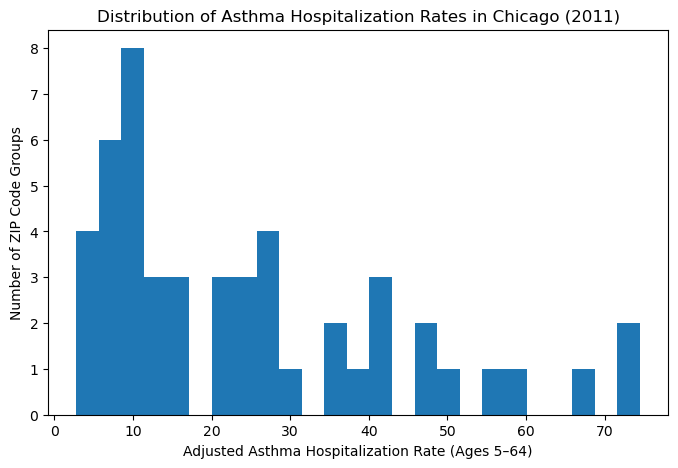

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(asthma_2011["adjusted_rate"], bins=25)
plt.xlabel("Adjusted Asthma Hospitalization Rate (Ages 5–64)")
plt.ylabel("Number of ZIP Code Groups")
plt.title("Distribution of Asthma Hospitalization Rates in Chicago (2011)")
plt.show()

## Distribution of Hospitalization Rates

Asthma hospitalization rates vary substantially across ZIP code groupings.
While many ZIP groups have relatively low adjusted rates, a smaller number
exhibit much higher hospitalization rates, indicating uneven geographic burden
across the city.


In [32]:
asthma_2011_sorted = asthma_2011.sort_values(
    by="adjusted_rate", ascending=False
)

asthma_2011_sorted.head(10)

,zip_group,adjusted_rate
17,60624,74.5
26,60636,73.3
14,60621,68.1
37,60649,59.9
33,60644,55.0
5,60612,49.7
12,60619,46.7
38,60651,46.2
20,60628,42.5
13,60620,42.1


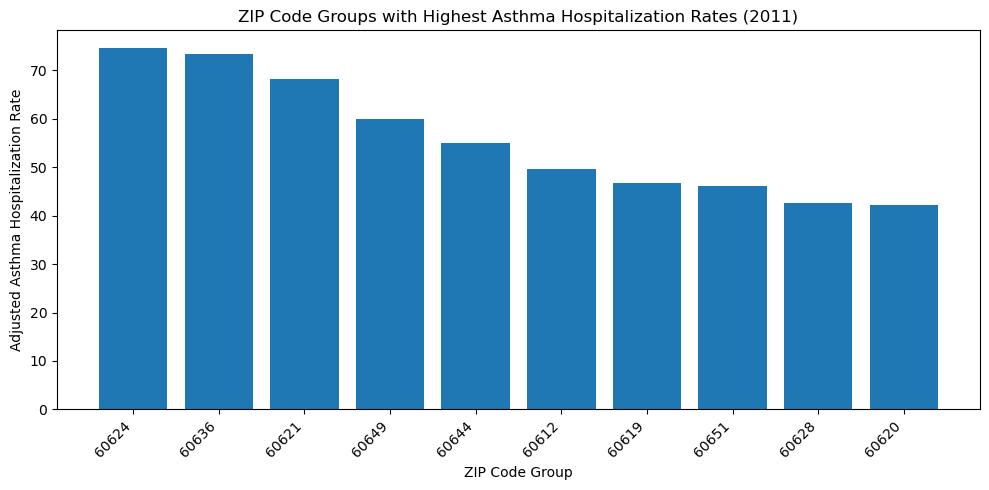

In [34]:
top_zip = asthma_2011_sorted.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_zip["zip_group"], top_zip["adjusted_rate"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("ZIP Code Group")
plt.ylabel("Adjusted Asthma Hospitalization Rate")
plt.title("ZIP Code Groups with Highest Asthma Hospitalization Rates (2011)")
plt.tight_layout()
plt.show()


## High-Burden ZIP Code Groups

A subset of ZIP code groupings experiences notably higher adjusted asthma
hospitalization rates compared to the rest of Chicago. These areas represent
locations of concentrated asthma burden and will be used for comparison with
other chronic disease patterns in subsequent analyses.

## Persistent Asthma Hospitalization Burden (5-Year Average, 2007–2011)

In [40]:
years = [2007, 2008, 2009, 2010, 2011]

rate_columns = [
    f"Adjusted Rate {year} (Ages 5-64 only)" for year in years
]

rate_columns

['Adjusted Rate 2007 (Ages 5-64 only)',
 'Adjusted Rate 2008 (Ages 5-64 only)',
 'Adjusted Rate 2009 (Ages 5-64 only)',
 'Adjusted Rate 2010 (Ages 5-64 only)',
 'Adjusted Rate 2011 (Ages 5-64 only)']

In [42]:
asthma_5yr = asthma[["ZIP code (or aggregate)"] + rate_columns].copy()

asthma_5yr = asthma_5yr.rename(
    columns={"ZIP code (or aggregate)": "zip_group"}
)

asthma_5yr.head()

,zip_group,Adjusted Rate 2007 (Ages 5-64 only),Adjusted Rate 2008 (Ages 5-64 only),Adjusted Rate 2009 (Ages 5-64 only),Adjusted Rate 2010 (Ages 5-64 only),Adjusted Rate 2011 (Ages 5-64 only)
0,"60606, 60607 & 60661",15.0,13.7,11.3,15.1,15.9
1,"60601, 60602, 60603, 60604, 60605 & 60611",6.7,5.1,11.6,9.6,8.6
2,60608,13.3,17.1,17.6,13.6,15.6
3,60609,28.9,28.2,31.5,23.5,27.7
4,60610 & 60654,21.9,26.0,29.3,21.6,21.6


In [44]:
asthma_5yr.isna().sum()

zip_group                              0
Adjusted Rate 2007 (Ages 5-64 only)    0
Adjusted Rate 2008 (Ages 5-64 only)    0
Adjusted Rate 2009 (Ages 5-64 only)    0
Adjusted Rate 2010 (Ages 5-64 only)    0
Adjusted Rate 2011 (Ages 5-64 only)    0
dtype: int64

In [46]:
asthma_5yr["avg_adjusted_rate_2007_2011"] = asthma_5yr[
    rate_columns
].mean(axis=1, skipna=True)

asthma_5yr.head()

,zip_group,Adjusted Rate 2007 (Ages 5-64 only),Adjusted Rate 2008 (Ages 5-64 only),Adjusted Rate 2009 (Ages 5-64 only),Adjusted Rate 2010 (Ages 5-64 only),Adjusted Rate 2011 (Ages 5-64 only),avg_adjusted_rate_2007_2011
0,"60606, 60607 & 60661",15.0,13.7,11.3,15.1,15.9,14.20
1,"60601, 60602, 60603, 60604, 60605 & 60611",6.7,5.1,11.6,9.6,8.6,8.32
2,60608,13.3,17.1,17.6,13.6,15.6,15.44
3,60609,28.9,28.2,31.5,23.5,27.7,27.96
4,60610 & 60654,21.9,26.0,29.3,21.6,21.6,24.08


In [48]:
asthma_5yr_sorted = asthma_5yr.sort_values(
    by="avg_adjusted_rate_2007_2011",
    ascending=False
)

asthma_5yr_sorted[["zip_group", "avg_adjusted_rate_2007_2011"]].head(10)

,zip_group,avg_adjusted_rate_2007_2011
17,60624,75.10
26,60636,71.92
14,60621,70.88
37,60649,55.10
33,60644,51.66
38,60651,51.16
12,60619,50.76
5,60612,49.72
27,60637,46.10
20,60628,44.56


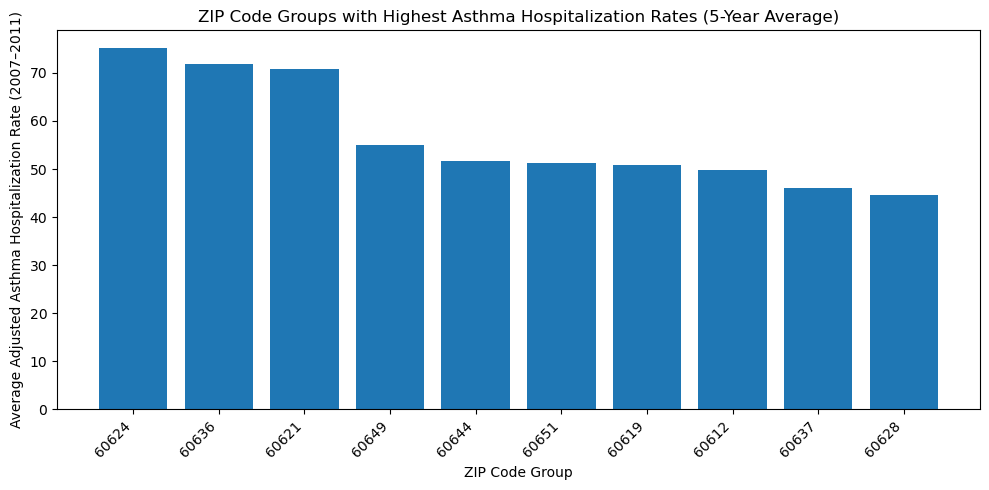

In [50]:
top_zip_5yr = asthma_5yr_sorted.head(10)

plt.figure(figsize=(10, 5))
plt.bar(
    top_zip_5yr["zip_group"],
    top_zip_5yr["avg_adjusted_rate_2007_2011"]
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("ZIP Code Group")
plt.ylabel("Average Adjusted Asthma Hospitalization Rate (2007–2011)")
plt.title("ZIP Code Groups with Highest Asthma Hospitalization Rates (5-Year Average)")
plt.tight_layout()
plt.show()

## Five-Year Average Asthma Hospitalization Rates (2007–2011)

To reduce the influence of year-to-year variability, age-adjusted asthma
hospitalization rates were averaged across a five-year period (2007–2011).
Several ZIP code groupings consistently exhibit higher average hospitalization
rates, suggesting persistent geographic disparities in asthma burden rather
than isolated single-year effects.
